# Forecasting Sample

## Introduction

Hello, this guided project was created to showcase my forecasting experience and knowledge. It is only used for that sole purpose and was strictly built by me, Jahazel Rios. This project covers P&L and cash flow projection.

> **Objectives:**
> * Using historical financial data to forecast future data helps a company decision process and efficiency review.
> * Explain the importance of P&L and cash flow forecasting in managing a company's financial health

# Data Collection and Understanding

## Business Context
XY Real Estate is a growing company operating in New York, specializing in real estate services, including property sales, rentals, and leasing representation. The company operates in three key locations: Albany (headquarters), Syracuse, and Caskill, with Albany contributing the largest share of the revenue.

##  Data Source
For this project, we are using simulated financial data that mimics the real-world financial operations of a real estate company. The data spans five years of quarterly financials (20 quarters), reflecting the company's historical performance. The dataset includes key metrics that are critical for financial analysis, particularly Profit & Loss (P&L) forecasting and cash flow projections.

##  Data Structure
The P&L dataset includes the following key sections:

**Income:**

* Revenue from Sales: This includes commissions earned from property sales. It has shown steady growth, driven by the increasing demand in the real estate market.

* Revenue from Rentals: This reflects commissions from leasing and rental deals. This segment also shows growth due to expanding operations.
Other Income: Occasional income from consulting services and listing fees.
Cost of Goods Sold (COGS):

**Commission Payouts:** 

A significant portion of revenue is paid out as commissions to real estate agents, making up 50% of the total income.
Operating Expenses: These include the operational costs necessary to run the business:

**Expenses**

* Salaries: Paid to headquarters employees and administrative staff, not to agents.

* Rent & Utilities: Expenses for maintaining office spaces in Albany, Syracuse, and Catskill.

* Marketing & Advertising: Costs for promotional campaigns aimed at attracting new clients and growing the company.

* Administrative Expenses: Software, licenses, legal fees, and other general operating expenses.

**Net Income:** 

After accounting for all operating and non-operating expenses, net income provides insight into the company's profitability over time.

##  Assumptions

The data assumes steady growth based on industry trends and market conditions in the New York real estate market. The revenue is split between property sales and rentals, with slight seasonality adjustments that reflect higher activity in spring and summer. The operating costs grow proportionally with the company’s expansion, while occasional fluctuations in interest expenses are accounted for.

##  Purpose
The collected data serves as the foundation for conducting P&L forecasting and cash flow projections. Understanding this data will allow us to project future financial performance under different scenarios, analyze profitability, and offer actionable insights for managing the company’s growth. This simulated dataset allows us to demonstrate forecasting techniques without relying on confidential or proprietary data.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the CSV file (make sure the path is correct if not in the same folder)
df_pl = pd.read_csv('Project forcasting.csv', parse_dates=['Quarter'], index_col='Quarter')

# Preview the first few rows of the data
df_pl.head()


<ipython-input-1-7d6b029ac898>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Revenue from Sales,Revenue from Rentals,Other Income,Total Income,COGS (Commission Payouts),Gross Profit,Salaries,Rent & Utilities,Marketing & Advertising,Admin Expenses,Total Operating Expenses,Operating Income,Interest Expenses,Net Income
Quarter,,,,,,,,,,,,,,
2019-03-31,"$200,000.00","$50,000.00","$6,872.70","$256,872.70","$128,436.35","$128,436.35","$52,237.06","$10,610.19","$18,886.77","$9,315.52","$91,049.54","$37,386.81","$3,125.72","$34,261.09"
2019-06-30,"$229,043.54","$58,657.49","$9,753.57","$297,454.60","$148,727.30","$148,727.30","$42,789.88","$12,475.88","$17,713.49","$8,116.49","$81,095.74","$67,631.56","$5,545.64","$62,085.92"
2019-09-30,"$254,028.22","$66,393.74","$8,659.97","$329,081.92","$164,540.96","$164,540.96","$45,842.89","$10,171.94","$23,287.38","$6,654.49","$85,956.70","$78,584.26","$4,257.42","$74,326.84"
2019-12-31,"$270,021.76","$71,814.30","$7,993.29","$349,829.35","$174,914.68","$174,914.68","$47,327.24","$14,546.60","$18,567.53","$5,317.79","$85,759.16","$89,155.51","$5,034.28","$84,121.23"
2020-03-31,"$220,546.26","$59,547.49","$5,780.09","$285,873.84","$142,936.92","$142,936.92","$49,121.40","$11,293.90","$17,809.35","$6,554.91","$84,779.56","$58,157.37","$6,630.27","$51,527.10"


/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-11-f5b7dfdf7169>:29: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df_pl.index[-1] + pd.offsets.QuarterEnd(), periods=8, freq='Q')


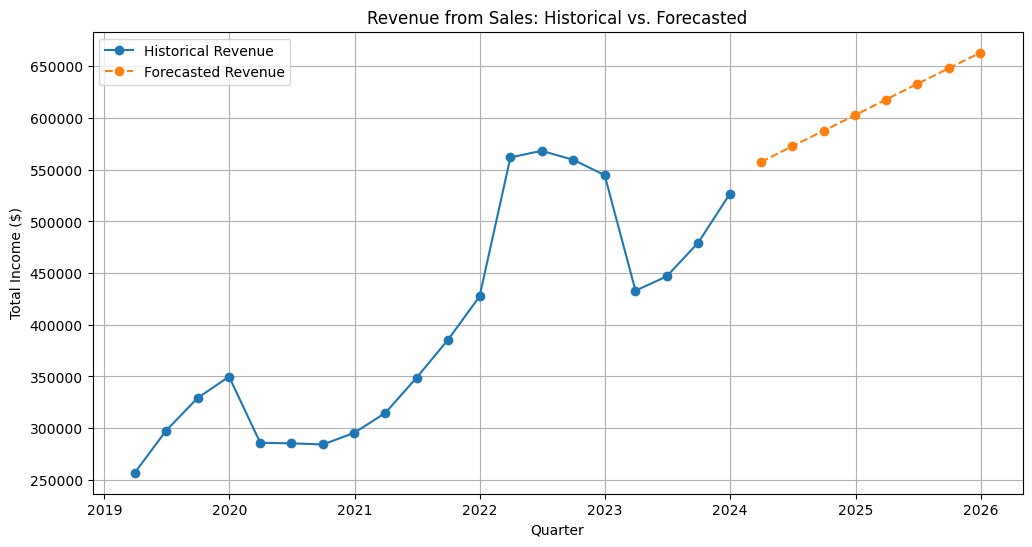

            Forecasted Total Income
Quarter                            
2024-03-31                557511.43
2024-06-30                572604.63
2024-09-30                587697.84
2024-12-31                602791.04
2025-03-31                617884.25
2025-06-30                632977.45
2025-09-30                648070.66
2025-12-31                663163.86


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file (using the specified file name)
df_pl = pd.read_csv('Project forcasting.csv', parse_dates=['Quarter'], index_col='Quarter')

# Prepare the data
# Create a numerical index for the quarters
df_pl['Quarter_Index'] = np.arange(len(df_pl))

# Select the dependent variable (Total income)
X = df_pl[['Quarter_Index']]  # Independent variable (time)
y = df_pl['Total Income']  # Dependent variable (sales revenue)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future quarters (e.g., for the next 8 quarters)
future_quarters = np.arange(len(df_pl), len(df_pl) + 8).reshape(-1, 1)  # Future indices
predictions = model.predict(future_quarters)

# Prepare to visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_pl.index, df_pl['Total Income'], label='Historical Revenue', marker='o')
future_dates = pd.date_range(start=df_pl.index[-1] + pd.offsets.QuarterEnd(), periods=8, freq='Q')
plt.plot(future_dates, predictions, label='Forecasted Revenue', marker='o', linestyle='--')
plt.title('Revenue from Sales: Historical vs. Forecasted')
plt.xlabel('Quarter')
plt.ylabel('Total Income ($)')
plt.legend()
plt.grid()
plt.show()

# Create a DataFrame to display the forecasted values
forecasted_df = pd.DataFrame({
    'Quarter': future_dates,
    'Forecasted Total Income': predictions
})

# Set the Quarter as the index
forecasted_df.set_index('Quarter', inplace=True)

# Round the forecasted revenue to two decimal places
forecasted_df['Forecasted Total Income'] = forecasted_df['Forecasted Total Income'].round(2)

# Display the forecasted values
print(forecasted_df)
